In this CA2 I need to visualize the LDA and PCA in order to compare which is better to be used for the machine learning accuracy F1 score for the my data analysis of the dataset that is given to us to perform and use the  GridSearch CV. Th

### Impoart Libraries 

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

The first thing that I do is to do list all the libraries because I will used to do my data analysis for the given dataset for our CA2. This will also help me to avoid restating the libraries everytime I will do my analaysis. 

In [2]:
df = pd.read_csv ("NHANES_age_prediction.csv")

The second thing I did is to load the dataset and and start my data analysis. the df means dataframe and the csv means the name of the dataset that I want to do my analysis. 

In [3]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


I used because I want to visualize the first 5 rows of the dataset.  This will help me to undersatand the columns numerical value. And also determine which column has the categorical value. 

In [4]:
df.tail()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


I used this because I wanted to show the last five rows of the dataset and this will guide me to understand that the age_group is the categorical varaible and the other features columns has the numerical varaiables. 

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


I used this because this will help me to understand if there is any data  incompatibilities, but as I have seen there is no incompatabilities on the dataset. There is dtypes float 9 and it has one object. 

In [6]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


I used df.describe to show the attribute of the dataset and to see the number of means. This helps me understand the mean average value of each column. The std shows the amount of change in the data and determines how it expands the values that come from the mean. The min shows the values of each column from higher to lower. Also, it helped me understand the numerical columns properly. (pandas.pydata.org, n.d.).

In [7]:
df['SEQN'].unique()

array([73564., 73568., 73576., ..., 83713., 83718., 83727.])

I used this because I want to know the unique value of the SEQN column. This will help me to understand the array values for my data cleaning analysis. 

In [8]:
df['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

I used this because I want to see the categorical that has not produce the numeric value. And the array help me to see the adult and senior label on the column of age_group.

In [9]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

I used this because I want to know if the dataset has a null values or missing values. As I execute the code there is no missing values in the dataset. 

In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2273    False
2274    False
2275    False
2276    False
2277    False
Length: 2278, dtype: bool

I used this because I want to make sure there is no null values or missing values in the dataset. It is false because there is no null values in the dataset. This will help me to analyse a provide quality analysis on how I will clean the dataset. 

In [11]:
#Drop the Id columns 
df_new = df.drop(columns=('SEQN'), index=1)
df_new.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08


I used this because I want to do my data cleaning as I think the SEQN columns is not necessary to used for my further analysis so I decide to drop it. 

In [12]:
df_new.shape

(2277, 9)

I used this because I want to show that I already successfully drop the SEQN column.  That is why it shows 2227 rows and 9 columns. 

In [13]:
df_new["age_group"].unique()
df_new["age_group"].value_counts()

age_group
Adult     1913
Senior     364
Name: count, dtype: int64

I used this because I want to have a thorough understanding of the unique value and the hanling the vvalue counts of the age group column. I gives me the adult value which is 1913 as stated above, and Senior value has 364. It also has an int64. This will help me understand how many is the total of adult and senior in the dataset.  

In [14]:
df_new.columns

Index(['age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU',
       'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

I used this to visulize the dataframe and consist the 9 columns that I have for the new dataframe. Since I successfully drop the column that I see that is not necessary to used for the continuation of my data analysis. 

In [15]:
df_new['age_group'].replace('Senior', 0, inplace = True)
df_new['age_group'].replace('Adult', 1, inplace = True)

I used this because I want to properly convert the categorical value to a numerical value in order for the prepation of the modelling and  machine learning analysis later since machine learning did not read a categorical value.Machine learning only read numbes,furthermore It will help me to provide a better analysis. 

In [16]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

df_new.RIAGENDR= le.fit_transform(df_new.RIAGENDR)
df_new.PAQ605 = le.fit_transform(df_new.PAQ605)
df_new.DIQ010 = le.fit_transform(df_new.DIQ010)

I used this label encoder because I want preprocess the data to trasform the features columns as I want to provide a better evalaution of the training of the models for my data analysis. 

In [17]:
df_new.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1,61.0,1,1,35.7,110.0,1,150.0,14.91
2,1,16.0,0,1,23.2,89.0,1,68.0,6.14
3,1,32.0,0,1,28.9,104.0,1,84.0,16.15
4,1,38.0,1,0,35.9,103.0,1,81.0,10.92
5,1,50.0,0,1,23.6,110.0,1,100.0,6.08


I used this because I want to know if I properly tranform the feature columns to a numerical value. This will support me to have basis for how I will properly provide my further evalution. This will help me to give a nice graph as I want to compare later the LDA and PCA which of them is better to use for my machine learning analysis later. 

In [18]:
df_new['DIQ010'].unique()

array([1, 0, 2], dtype=int64)

I used this because I want know the unique value it will help me to better analyze the column of the DIQ010 and as stated in the results there is a numerical value of the column DIQ010 and the dtype has int64. 

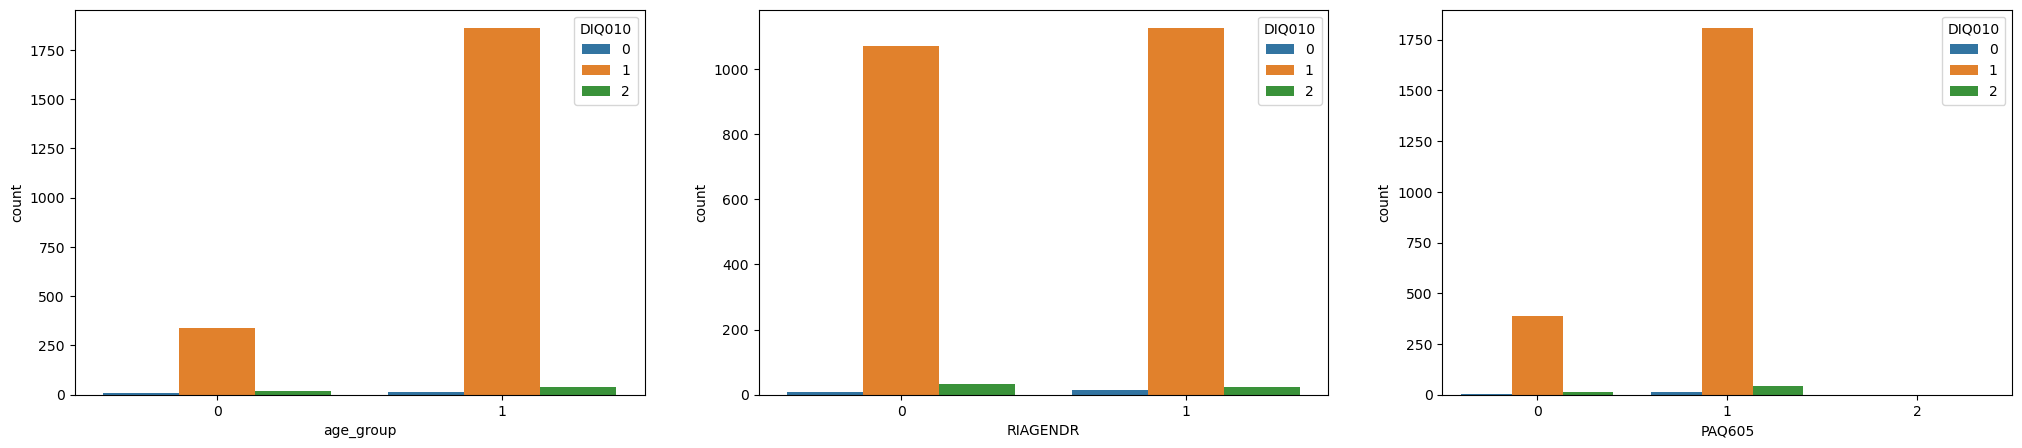

In [19]:
fig, ax = plt.subplots(1,3,figsize=(25,5))
for i, col in enumerate(["age_group","RIAGENDR","PAQ605"]):
  sns.countplot(data=df_new,
                x=col,
                hue='DIQ010',
                ax=ax[i])

I use because I want to visualize the t

<Axes: xlabel='DIQ010', ylabel='LBXIN'>

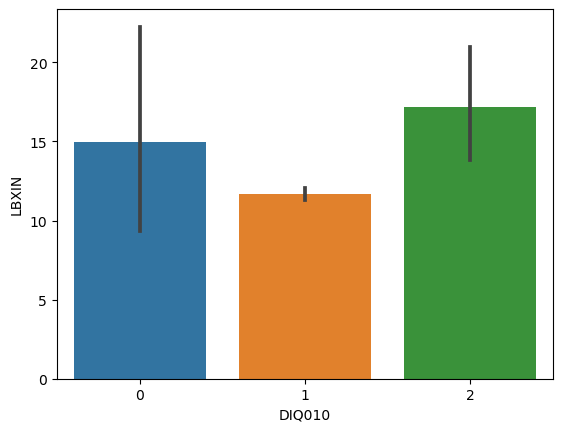

In [20]:
sns.barplot(x='DIQ010', y='LBXIN',data=df_new)

I use this because I want to show that the 0 number represents the 

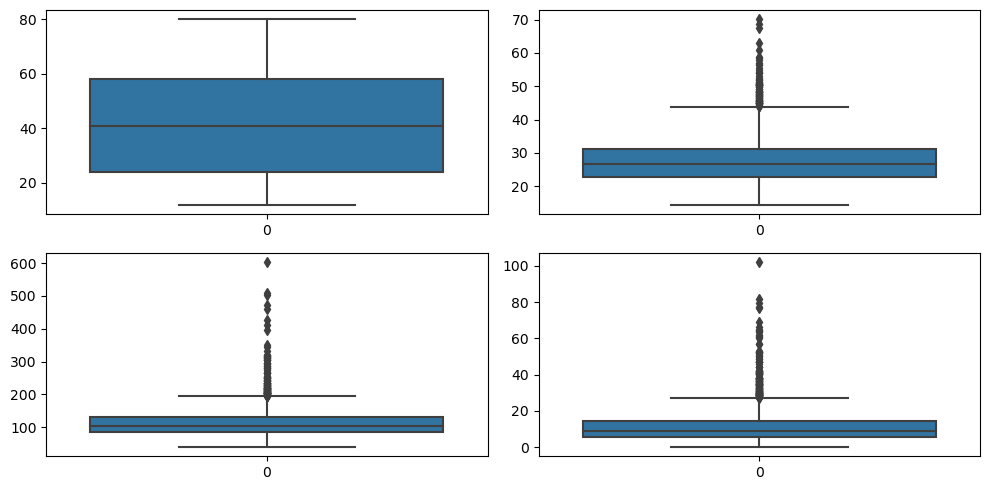

In [21]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['RIDAGEYR'], ax = axs[0,0])
plt2 = sns.boxplot(df['BMXBMI'], ax = axs[0,1])
plt3 = sns.boxplot(df['LBXGLT'], ax = axs[1,0])
plt4 = sns.boxplot(df['LBXIN'], ax = axs[1,1])

plt.tight_layout()

In [22]:
# Capital X because there are more than one feature 
  # y - lower case = because it's only one feature. 
    
X = df_new.drop(columns=["DIQ010"])
y = df_new['DIQ010']

X.shape, y.shape

((2277, 8), (2277,))

I used this because this is vital to execute to and show the target variable and the feature in preparation for my machine ro visulize the LDA and PCA properly. I used the shapee because I want to understand the shape of the X feature column that has a result of 22

In [23]:
class_feature_means = pd.DataFrame(columns=df_new["DIQ010"])
for c, rows in df_new.groupby('DIQ010'):
    class_feature_means[c] = rows.mean()
class_feature_means

DIQ010,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
age_group,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,...,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224,0.846224
RIDAGEYR,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,...,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511,41.262511
RIAGENDR,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,...,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284,0.512284
PAQ605,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,...,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021,0.823021
BMXBMI,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,...,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803,27.833803
LBXGLU,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,...,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028,98.631028
DIQ010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LBXGLT,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,...,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389,112.627389
LBXIN,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,...,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321,11.668321


In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
easy_lda = lda.fit_transform(X, y)

In [25]:
easy_lda  

array([[ 0.85925811,  0.49250595],
       [-1.19226268, -0.69006504],
       [-0.3725803 ,  0.32600783],
       ...,
       [ 0.00715763,  0.7537236 ],
       [-0.2769358 ,  0.15287498],
       [-0.06666746, -0.96188162]])

In [26]:
lda.explained_variance_ratio_

array([0.93220947, 0.06779053])

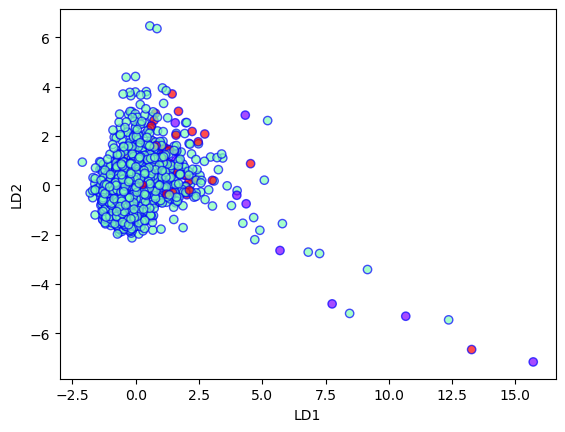

In [27]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    easy_lda[:,0],
    easy_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [29]:
pca.explained_variance_ratio_

array([0.78738857, 0.11729488])

In [30]:
X_pca

array([[ 39.34631469, -13.2462734 ],
       [-51.79551506,  17.70053923],
       [-29.5368704 ,   6.09429238],
       ...,
       [  8.57287538,  10.32311262],
       [ -6.74297253, -20.1399049 ],
       [ -7.26276743,  14.07061861]])

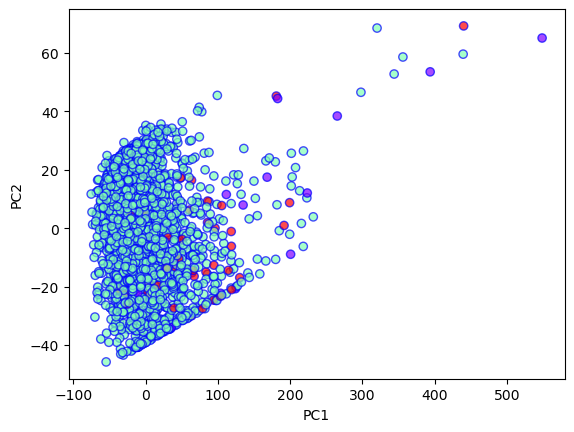

In [31]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [32]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1821, 2), (456, 2), (1821,), (456,))

In [33]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.97


<Axes: >

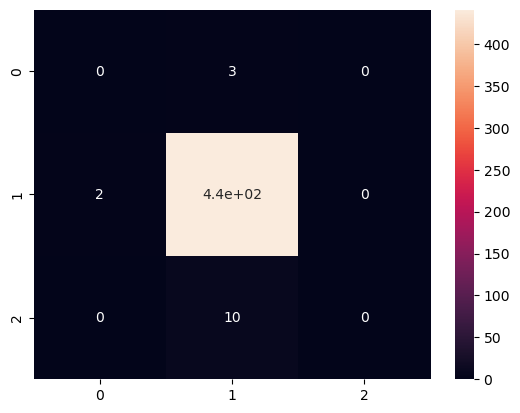

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

In [36]:
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.97      1.00      0.98       443
           2       0.00      0.00      0.00        10

    accuracy                           0.97       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.94      0.97      0.96       456



In [37]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=101)

In [38]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [39]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
# Making predictions
predictions = rfc.predict(X_test)

In [41]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [42]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.97      0.99      0.98       663
           2       0.00      0.00      0.00        14

    accuracy                           0.96       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.96      0.95       684



In [43]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[  0   6   1]
 [  1 655   7]
 [  1  13   0]]


In [44]:
print(accuracy_score(y_test,predictions))

0.9576023391812866


In [45]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 25, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 25, 10)}, scoring='accuracy')

In [46]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.177812,0.018306,0.009434,0.003428,2,{'max_depth': 2},0.962382,0.962382,0.962382,0.962264,0.965409,0.962964,0.001223,1
1,0.570957,0.224817,0.028423,0.013610,12,{'max_depth': 12},0.962382,0.962382,0.952978,0.959119,0.952830,0.957939,0.004280,3
2,0.833897,0.010826,0.034954,0.001005,22,{'max_depth': 22},0.959248,0.962382,0.956113,0.962264,0.955975,0.959196,0.002809,2


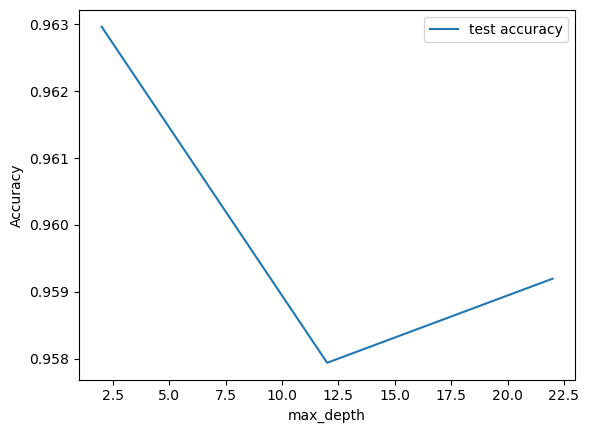

In [47]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [30,25,40],
    'min_samples_leaf': range(300, 500, 400),
    'min_samples_split': range(300, 700, 300),
    'n_estimators': [200,300, 400], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [30, 25, 40], 'max_features': [5, 10],
                         'min_samples_leaf': range(300, 500, 400),
                         'min_samples_split': range(300, 700, 300),
                         'n_estimators': [200, 300, 400]},
             verbose=1)

In [59]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9635907093534213 using {'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 300, 'min_samples_split': 300, 'n_estimators': 200}


In [60]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [61]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [62]:
# predict
predictions = rfc.predict(X_test)

In [63]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.97      1.00      0.98       663
           2       0.00      0.00      0.00        14

    accuracy                           0.97       684
   macro avg       0.32      0.33      0.33       684
weighted avg       0.94      0.97      0.95       684



In [56]:
print(confusion_matrix(y_test,predictions))

[[  0   7   0]
 [  0 663   0]
 [  0  14   0]]
